
# PROJET 5 : Optimisez la gestion des données d'une boutique avec R ou Python

# 1.Importation des librairies et des fichiers de données



## 1.1 Importation des librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

## 1.2 Importation des fichiers de données

In [ ]:
# df erp

erp = pd.read_excel('Fichier_erp.xlsx')
erp.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [ ]:
# df web

web = pd.read_excel('Fichier_web.xlsx')
web.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
# df liaison

liaison = pd.read_excel('fichier_liaison.xlsx')
liaison.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


# 2.Analyse exploratoire des fichiers de données

## 2.1 Fichier erp

In [ ]:
# Taille du df

erp.shape

(825, 5)

In [ ]:
# Informations sur le df

erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [ ]:
# Description sur le df

erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


## 2.2 Fichier web

In [ ]:
# Taille du df

web.shape

(1513, 28)

In [ ]:
# Informations sur le df

web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

## 2.3 Fichier liaison

In [ ]:
# Taille du df

liaison.shape

(825, 2)

In [ ]:
# Informations sur le df

liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


# 3.Les incohérences

## 3.1 Fichier erp

In [ ]:
# erp : Valeurs négatives du prix ?

erp[erp['price'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status
469,5017,0,-8.0,0,outofstock
739,6594,0,-1.0,192,instock


In [ ]:
# erp : Valeurs négatives de la quantité ?

erp[erp['stock_quantity'] < 0]

,product_id,onsale_web,price,stock_quantity,stock_status
449,4973,0,10.0,-1,outofstock
573,5700,1,44.5,-1,outofstock


In [ ]:
# erp : instock alors que la quantité est zéro?

erp.loc[(erp['stock_quantity'] == 0) & (erp['stock_status'] == 'instock')]

,product_id,onsale_web,price,stock_quantity,stock_status
443,4954,1,25.0,0,instock


## 3.2 Fichier web


In [ ]:
# web : Lignes de 'id_web'qui sont des varchars

web.loc[(web['sku'].str.isnumeric() == False)]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
196,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
382,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
490,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
503,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
# Lignes incohérentes de 'post_title'

web.loc[(web['post_title']== 'Bon cadeau de 25€')]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
196,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
382,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
# Lignes incohérentes de 'post_name '

web.loc[(web['post_name']== 'bon-cadeau-de-25-euros')]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
196,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
382,bon-cadeau-25-euros,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


# 4.Nettoyage des données

## 4.1 df erp

In [ ]:
# Erreurs de types : vérifier si les variables ont bien été importées dans le bon type

erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [ ]:
# Changement du type de 'product_id'

erp['product_id'] = erp['product_id'].astype(object)

In [ ]:
# Vérification des types

erp.dtypes

product_id         object
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

In [ ]:
# Y a-t-il des lignes dupliquées ? Non puisque tout est "False"

erp.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Length: 825, dtype: bool

In [ ]:
# Le nombre de valeurs manquantes : 0

erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

## 4.2 df web

In [ ]:
# Renommer la variable sku en id_web dans le df web

web = web.rename(columns ={'sku':'id_web'})
web.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [ ]:
# Les types de données dans chaque variable du df semblent corrects, même les dates

web.dtypes

id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [ ]:
# Données dupliquées ? Non

web.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1508    False
1509    False
1510    False
1511    False
1512    False
Length: 1513, dtype: bool

In [ ]:
# Présence des valeurs manquantes ? Oui

web.isnull().sum()

id_web                     85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [ ]:
# Echantillon du df web sans les valeurs manquantes de la colonne 'id_web'

Web_not_null = web[web['id_web'].notnull()]
Web_not_null.head()

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,2020-08-25 18:35:02,2020-08-25 16:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,2020-08-21 11:35:02,2020-08-21 09:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
5,13895,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-19 10:41:50,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
#  Les infos du df, particulièrement pour la variable 'id_web'

Web_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object        
 13  pos

## 4.3 df liaison


In [ ]:
# Les types de données dans chaque variable du df semblent corrects

liaison.dtypes

product_id     int64
id_web        object
dtype: object

In [ ]:
# Données dupliquées ? Non

liaison.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
820    False
821    False
822    False
823    False
824    False
Length: 825, dtype: bool

In [ ]:
# Le nombre de valeurs manquantes ?

liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

# 5.Définition de la clé pour la jointure et jointure


## 5.1 Recherche des clés primaires

In [ ]:
# Création de la fonction pour la clé primaire

def pri_key(df):
    print('Le nombre de lignes du df =',df.shape[0])
    for i in df.columns:
        print("Le nombre valeur unique", i,":", df.drop_duplicates([i]).shape[0])

    a=0
    for i in df.columns:

        if df.shape[0] == df.drop_duplicates([i]).shape[0]:
            print("Le valeur ", i,":","peut être defini comme primary key")
            a +=1

    if a== 0:
        print("Oopps!. Vérifiez le dataframe" )

In [ ]:
# df erp

pri_key(erp)

Le nombre de lignes du df = 825
Le nombre valeur unique product_id : 825
Le nombre valeur unique onsale_web : 2
Le nombre valeur unique price : 382
Le nombre valeur unique stock_quantity : 129
Le nombre valeur unique stock_status : 2
Le valeur  product_id : peut être defini comme primary key


product_id peut être défini comme primary key donc UNICITE

In [ ]:
# df Web_not_null

pri_key(Web_not_null)

Le nombre de lignes du df = 1428
Le nombre valeur unique id_web : 714
Le nombre valeur unique virtual : 1
Le nombre valeur unique downloadable : 1
Le nombre valeur unique rating_count : 1
Le nombre valeur unique average_rating : 1
Le nombre valeur unique total_sales : 41
Le nombre valeur unique tax_status : 2
Le nombre valeur unique tax_class : 1
Le nombre valeur unique post_author : 2
Le nombre valeur unique post_date : 714
Le nombre valeur unique post_date_gmt : 714
Le nombre valeur unique post_content : 1
Le nombre valeur unique post_title : 711
Le nombre valeur unique post_excerpt : 678
Le nombre valeur unique post_status : 1
Le nombre valeur unique comment_status : 1
Le nombre valeur unique ping_status : 1
Le nombre valeur unique post_password : 1
Le nombre valeur unique post_name : 714
Le nombre valeur unique post_modified : 587
Le nombre valeur unique post_modified_gmt : 587
Le nombre valeur unique post_content_filtered : 1
Le nombre valeur unique post_parent : 1
Le nombre valeu

id_web ne peut pas être défini comme clé primaire, car elle est présente plusieurs fois dans le df

In [ ]:
# Filtrage des produits dans 'post_type' car il ya aussi les pièces jointes (Attachment)

produit = Web_not_null[Web_not_null['post_type'] == 'product']
produit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 2 to 1510
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_web                 714 non-null    object        
 1   virtual                714 non-null    int64         
 2   downloadable           714 non-null    int64         
 3   rating_count           714 non-null    int64         
 4   average_rating         714 non-null    float64       
 5   total_sales            714 non-null    float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            714 non-null    float64       
 9   post_date              714 non-null    datetime64[ns]
 10  post_date_gmt          714 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             714 non-null    object        
 13  post

In [ ]:
# df produit

pri_key(produit)

Le nombre de lignes du df = 714
Le nombre valeur unique id_web : 714
Le nombre valeur unique virtual : 1
Le nombre valeur unique downloadable : 1
Le nombre valeur unique rating_count : 1
Le nombre valeur unique average_rating : 1
Le nombre valeur unique total_sales : 41
Le nombre valeur unique tax_status : 1
Le nombre valeur unique tax_class : 1
Le nombre valeur unique post_author : 2
Le nombre valeur unique post_date : 714
Le nombre valeur unique post_date_gmt : 714
Le nombre valeur unique post_content : 1
Le nombre valeur unique post_title : 711
Le nombre valeur unique post_excerpt : 677
Le nombre valeur unique post_status : 1
Le nombre valeur unique comment_status : 1
Le nombre valeur unique ping_status : 1
Le nombre valeur unique post_password : 1
Le nombre valeur unique post_name : 714
Le nombre valeur unique post_modified : 587
Le nombre valeur unique post_modified_gmt : 587
Le nombre valeur unique post_content_filtered : 1
Le nombre valeur unique post_parent : 1
Le nombre valeur

id_web peut donc être défini comme clé primaire donc UNICITE



In [ ]:
# df liaison

pri_key(liaison)

Le nombre de lignes du df = 825
Le nombre valeur unique product_id : 825
Le nombre valeur unique id_web : 735
Le valeur  product_id : peut être defini comme primary key


product_id peut être défini comme clé primaire, donc UNICITE

## 5.2 Jointure des dataframes

In [ ]:
# Première jointure, merge permet de vérifier la qualité de la jointure, et tester

erp_liaison = pd.merge(erp, liaison, on = 'product_id')
erp_liaison

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,NaN
821,7204,0,45.0,9,instock,NaN
822,7247,1,54.8,23,instock,13127-1
823,7329,0,26.5,14,instock,14680-1


In [ ]:
# Jointure finale

jointure = pd.merge(erp_liaison, produit, on = 'id_web', how = 'right')
jointure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 713
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   product_id             714 non-null    object        
 1   onsale_web             714 non-null    int64         
 2   price                  714 non-null    float64       
 3   stock_quantity         714 non-null    int64         
 4   stock_status           714 non-null    object        
 5   id_web                 714 non-null    object        
 6   virtual                714 non-null    int64         
 7   downloadable           714 non-null    int64         
 8   rating_count           714 non-null    int64         
 9   average_rating         714 non-null    float64       
 10  total_sales            714 non-null    float64       
 11  tax_status             714 non-null    object        
 12  tax_class              0 non-null      float64       
 13  post_

In [ ]:
jointure

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,4165,1,12.0,57,instock,15075,0,0,0,0.0,...,pares-balta-penedes-indigena-2017,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,4174,1,5.7,94,instock,16209,0,0,0,0.0,...,maurel-cabardes-tradition-2017,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,5796,1,12.5,12,instock,13895,0,0,0,0.0,...,chateau-saransot-dupre-bordeaux-blanc-2016,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,4582,1,109.6,7,instock,12857,0,0,0,0.0,...,chateau-de-puligny-montrachet-1cru-champ-canet...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,6106,1,74.8,15,instock,14106,0,0,0,0.0,...,stephane-tissot-chateau-chalon-2011,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,4074,1,12.7,50,instock,15941,0,0,0,0.0,...,jerome-cotes-du-rhone-2018,2020-06-25 14:00:03,2020-06-25 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
710,4617,1,67.5,1,instock,10459,0,0,0,0.0,...,alphonse-mellot-sancerre-rouge-generation-xix-...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
711,4062,1,11.9,60,instock,16320,0,0,0,0.0,...,mourgues-du-gres-costieres-de-nimes-terre-darg...,2020-08-25 11:15:03,2020-08-25 09:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
712,4262,1,15.8,35,instock,15663,0,0,0,0.0,...,chermette-domaine-du-vissoux-brouilly-pierreux...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


# 6.Calcul du ca_produit et du CA total


## 6.1 Colonne de chiffre d'affaire de chaque produit

In [ ]:
# Création de la colonne 'ca_produit'

jointure['ca_produit'] = jointure['price']*jointure['total_sales']
jointure

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,ca_produit
0,4165,1,12.0,57,instock,15075,0,0,0,0.0,...,2020-08-20 15:35:02,2020-08-20 13:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,36.0
1,4174,1,5.7,94,instock,16209,0,0,0,0.0,...,2020-08-05 18:05:03,2020-08-05 16:05:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,34.2
2,5796,1,12.5,12,instock,13895,0,0,0,0.0,...,2020-04-25 21:11:40,2020-04-25 19:11:40,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
3,4582,1,109.6,7,instock,12857,0,0,0,0.0,...,2020-02-06 16:35:02,2020-02-06 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
4,6106,1,74.8,15,instock,14106,0,0,0,0.0,...,2020-05-29 17:35:03,2020-05-29 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,4074,1,12.7,50,instock,15941,0,0,0,0.0,...,2020-06-25 14:00:03,2020-06-25 12:00:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,50.8
710,4617,1,67.5,1,instock,10459,0,0,0,0.0,...,2020-08-24 14:05:02,2020-08-24 12:05:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,0.0
711,4062,1,11.9,60,instock,16320,0,0,0,0.0,...,2020-08-25 11:15:03,2020-08-25 09:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,35.7
712,4262,1,15.8,35,instock,15663,0,0,0,0.0,...,2020-08-01 09:35:02,2020-08-01 07:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,47.4


## 6.2 Calcul du CA total

In [ ]:
# Calcul du CA total

CA_total = jointure['ca_produit'].sum()

In [ ]:
# Affichage

print("Le chiffre d'affaires total est de:", CA_total, 'euros')

Le chiffre d'affaires total est de: 70568.6 euros


# 7.Analyse des outliers de la variable 'price'




## 7.1 Quelques indicateurs statistiques

In [ ]:
# Description de 'price'

jointure['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [ ]:
# Indicateurs statistiques de la variable 'price'

print("Le mode est de", jointure['price'].mode())
print("La variance est de", round(jointure['price'].var(ddof=0),2))
print("Le Skewness est de", round(jointure['price'].skew(),2))

Le mode est de 0    19.0
Name: price, dtype: float64
La variance est de 772.34
Le Skewness est de 2.58


In [ ]:
# La médiane

jointure['price'].median()

23.55

In [ ]:
# Z-score method (Utilisation de la moyenne et de l'écart-type)

mean = np.mean(jointure['price'])
std = np.std(jointure['price'])
threshold = 2
outliers = []
for x in jointure['price'] :
    z_score = (x -mean) / std
    if abs(z_score) > threshold :
        outliers.append(x)
print("Mean : ",mean)
print("\nStandard deviation :",std)
print("Nombre d'outliers détectés : " + str(len(outliers)))
print('nOutliers', outliers)

Mean :  32.49313725490196

Standard deviation : 27.791042941002917
Nombre d'outliers détectés : 30
nOutliers [109.6, 115.0, 100.0, 102.3, 105.0, 99.0, 88.4, 175.0, 124.8, 176.0, 112.0, 121.0, 105.0, 122.0, 105.6, 217.5, 137.0, 121.0, 115.0, 116.4, 104.0, 93.0, 157.0, 114.0, 126.5, 92.0, 191.3, 135.0, 108.5, 225.0]


In [ ]:
outliers

[109.6,
 115.0,
 100.0,
 102.3,
 105.0,
 99.0,
 88.4,
 175.0,
 124.8,
 176.0,
 112.0,
 121.0,
 105.0,
 122.0,
 105.6,
 217.5,
 137.0,
 121.0,
 115.0,
 116.4,
 104.0,
 93.0,
 157.0,
 114.0,
 126.5,
 92.0,
 191.3,
 135.0,
 108.5,
 225.0]

In [ ]:
 # Affichage des outliers

affichage = jointure[jointure['price'].isin(outliers)]
affichage[['id_web', 'post_title', 'price', 'ca_produit']]

,id_web,post_title,price,ca_produit
3,12857,Château de Meursault Puligny-Montrachet 1er Cr...,109.6,0.0
5,13996,Domaine des Comtes Lafon Volnay 1er Cru Santen...,115.0,230.0
16,15382,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,100.0,0.0
37,14805,Domaine Des Croix Corton Grand Cru Les Grèves ...,102.3,0.0
102,12791,Domaine des Comtes Lafon Volnay 1er Cru Santen...,105.0,0.0
119,11601,Domaine des Comtes Lafon Volnay 1er Cru Champa...,99.0,0.0
152,11668,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,88.4,0.0
177,15185,Camille Giroud Clos de Vougeot 2016,175.0,0.0
181,14915,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,0.0
186,3510,Cognac Frapin VIP XO,176.0,2288.0


In [ ]:
# Méthode 2 : Ecarts des interquartiles IQR

Q1 = np.percentile(jointure['price'], 25, method='midpoint')
Q3 = np.percentile(jointure['price'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

28.050000000000004


In [ ]:
# Au dessus de Q3

upper = Q3+1.5*IQR
upper_array = np.array(jointure['price']) >= upper
print("Upper Bound:", upper)
print(upper_array.sum())

Upper Bound: 84.22500000000001
32


In [ ]:
# En dessous de Q1

lower = Q1-1.5*IQR
lower_array = np.array(jointure['price']) <= lower
print("Lower Bound:", lower)
print(lower_array.sum())

Lower Bound: -27.975
0


In [ ]:
# Affichage des outliers

print("\n",jointure.loc[(jointure['price']>84.225),('price','post_title')])


      price                                         post_title
3    109.6  Château de Meursault Puligny-Montrachet 1er Cr...
5    115.0  Domaine des Comtes Lafon Volnay 1er Cru Santen...
12    86.8  Champagne Agrapart &amp; Fils Minéral Extra Br...
16   100.0  Zind-Humbrecht Riesling Grand Cru Rangen De Th...
37   102.3  Domaine Des Croix Corton Grand Cru Les Grèves ...
102  105.0  Domaine des Comtes Lafon Volnay 1er Cru Santen...
119   99.0  Domaine des Comtes Lafon Volnay 1er Cru Champa...
152   88.4  Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...
177  175.0                Camille Giroud Clos de Vougeot 2016
181  124.8  Domaine Weinbach Gewurztraminer Grand Cru Furs...
186  176.0                               Cognac Frapin VIP XO
187  112.0  Champagne Agrapart &amp; Fils L'Avizoise Extra...
201  121.0  Domaine des Comtes Lafon Volnay 1er Cru Champa...
232  105.0  Domaine des Comtes Lafon Volnay 1er Cru Santen...
239  122.0  Wemyss Malts Single Cask Scotch Whisky Choc 'n...
286  1

## 7.2 Graphiques : representations de la dispersion des prix

Text(0.5, 1.0, 'Graphique 1 : Histogramme des prix')

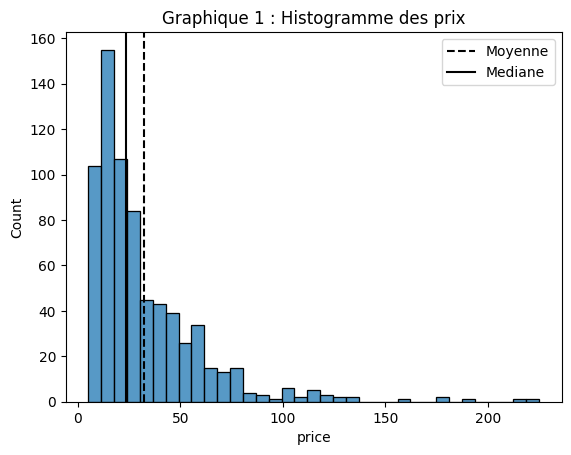

In [ ]:
# Representation de la repartition des prix : Histogramme

mean = jointure['price'].mean()
median = jointure['price'].median()
sb.histplot(data= jointure['price'])
plt.axvline(mean, color="black", linestyle="--")
plt.axvline(median, color="black", linestyle="-")
plt.legend({"Moyenne":mean,"Mediane":median})
plt.title("Graphique 1 : Histogramme des prix")

Text(0.5, 1.0, 'Graphique 2 : Boîte à moustache de la répartition des prix')

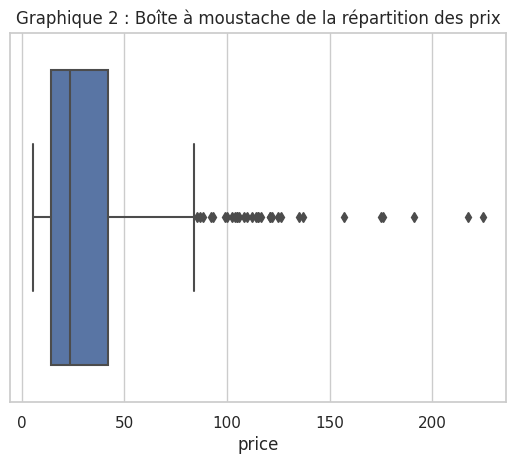

In [ ]:
# Représentation graphique Box plot/ Boîte à moustache

sb.set(style ='whitegrid')
sb.boxplot(x = 'price', data = jointure)
plt.title("Graphique 2 : Boîte à moustache de la répartition des prix")

<function matplotlib.pyplot.show(close=None, block=None)>

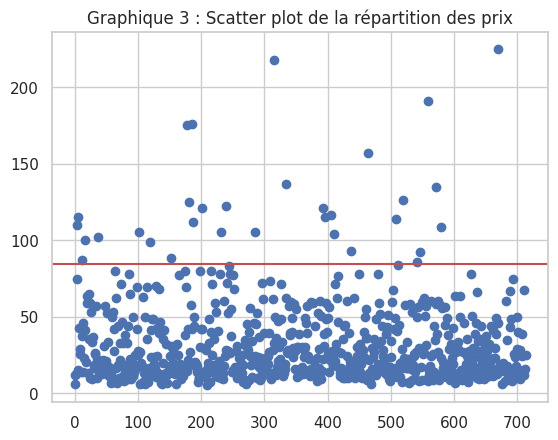

In [ ]:
# Scatter plot/ Nuage des points

plt.scatter(jointure['price'].index, jointure['price'].values)
plt.axhline(y = 84.225, color = 'r', linestyle ='-')
plt.title("Graphique 3 : Scatter plot de la répartition des prix")
plt.show

# 8.Pour aller plus loin :

In [ ]:
# Identifier les 10 bouteilles les plus vendues, nom, nombre de ventes, prix, ca et disponibilité en stock

Best_Seller = jointure[['id_web','post_title','total_sales','price', 'ca_produit', 'stock_status']]
print(Best_Seller.nlargest(10,'total_sales'))

    id_web                                         post_title  total_sales  \
365   7818             Champagne Gosset Grand Blanc de Blancs         96.0   
666   1662                        Champagne Gosset Grand Rosé         87.0   
525  16416  Gilles Robin Crozes-Hermitage Rouge Papillon 2019         62.0   
138  16295  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...         46.0   
104  16210                   Maurel Pays d'Oc Chardonnay 2019         43.0   
265  16189  Le Pas de l'Escalette Languedoc Les Petits Pas...         42.0   
566  16580           Domaine Giudicelli Patrimonio Blanc 2019         41.0   
367    304                    Champagne Gosset Grande Réserve         40.0   
92   16264     Château de La Liquière Faugères L'Ampoule 2019         38.0   
534     38         Emile Boeckel Crémant Brut Blanc de Blancs         38.0   

     price  ca_produit stock_status  
365   49.0      4704.0   outofstock  
666   49.0      4263.0      instock  
525   16.6      1029.2     

In [ ]:
# Identifier les 10 bouteilles les plus chères, nom, total des ventes, prix, ca et disponibilité en stock

More_expensive = jointure[['id_web','post_title','total_sales','price', 'ca_produit', 'stock_status']]
print(More_expensive.nlargest(10,'price'))

    id_web                                         post_title  total_sales  \
670  15940     Champagne Egly-Ouriet Grand Cru Millésimé 2008          5.0   
315  14581     David Duband Charmes-Chambertin Grand Cru 2014          0.0   
559  14983  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...          3.0   
186   3510                               Cognac Frapin VIP XO         13.0   
177  15185                Camille Giroud Clos de Vougeot 2016          0.0   
464   7819  Cognac Frapin Château de Fontpinot 1989 20 Ans...          0.0   
334  14220  Domaine Des Croix Corton Charlemagne Grand Cru...          5.0   
572  14923             Champagne Gosset Célébris Vintage 2007          2.0   
519  12589     Champagne Egly-Ouriet Grand Cru Blanc de Noirs         11.0   
181  14915  Domaine Weinbach Gewurztraminer Grand Cru Furs...          0.0   

     price  ca_produit stock_status  
670  225.0      1125.0   outofstock  
315  217.5         0.0      instock  
559  191.3       573.9     

In [ ]:
# Il serait intéressant d'analyser la corrélation entre 'price' et 'total_sales'...